In [1]:
%matplotlib inline  
import itertools
import numpy as np
import matplotlib
from matplotlib import pyplot as plt 

from igmm import IGMM

In [2]:
np.random.seed(0)
model = IGMM(min_components=2, max_step_components=5, max_components=5)

In [3]:
n_samples = 100 # Samples per component

In [4]:
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
matplotlib.rcParams.update({'font.size': 18})
title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'size':'30'}

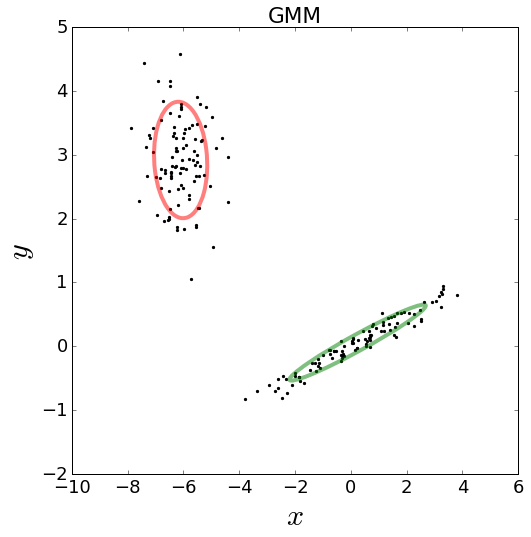

In [5]:
# Batch 1
C1 = np.array([[0., -0.1], [1.7, .4]])
X1 = np.r_[np.dot(np.random.randn(n_samples, 2), C1),
          .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]
model.train(X1)
fig1, ax1 = plt.subplots(1,1)
ax1 = model.plot_gmm_projection(0,1, axes=ax1)
plt.hold(True)
plt.scatter(X1[:,0],X1[:,1],c='k', marker='.')
plt.xlabel('$x$',**axis_font)
plt.ylabel('$y$',**axis_font)

0.05


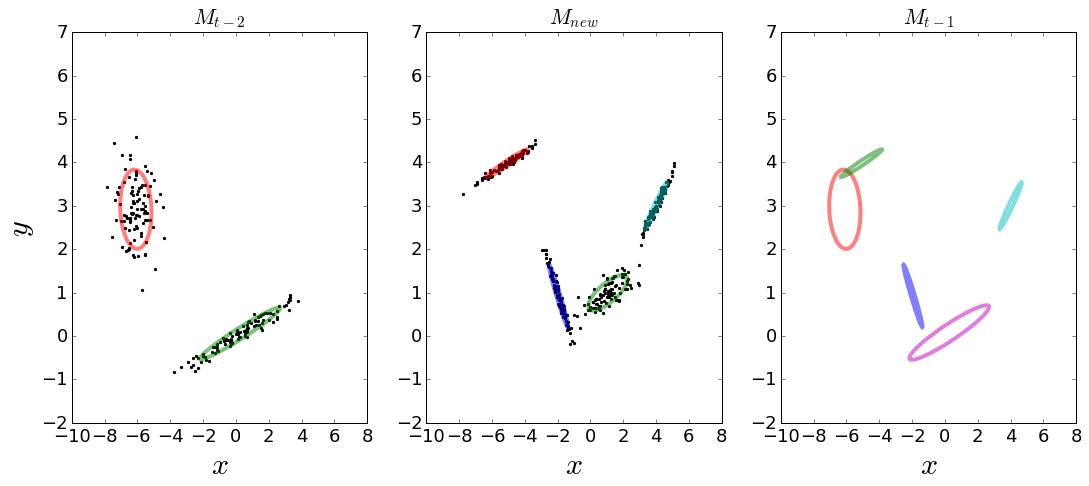

In [6]:
matplotlib.rcParams['figure.figsize'] = (18.0, 7.0)

# Batch 2
C2 = np.array([[.8, .2], [0.1, -.2]])
C3 = np.array([[0.1, -0.1], [1., .8]])
C4 = np.array([[-0.8, 1.], [-0.1, -0.1]])
fig2, ax2 = plt.subplots(1,3)
ax2[0] = model.plot_gmm_projection(0,1, axes=ax2[0])
plt.title('$M_{t-2}$', y=1.01)
plt.ylabel('$y$',**axis_font)
plt.hold(True)
plt.scatter(X1[:,0],X1[:,1],c='k', marker='.')

X2 = np.r_[np.dot(np.random.randn(n_samples, 2), 0.5 * C1) + np.array([-5, 4]),
           np.dot(np.random.randn(n_samples, 2), C2) + np.array([1, 1]),
           np.dot(np.random.randn(n_samples, 2), 0.5 * C3) + np.array([4, 3]),
         np.dot(np.random.randn(n_samples, 2), 0.5 * C4) + np.array([-2, 1])]
model.train(X2)

ax2[1] = model.short_term_model.plot_gmm_projection(0,1, axes=ax2[1])
plt.title('$M_{new}$', y=1.01)
#plt.sca(ax2[1])
plt.hold(True)
plt.scatter(X2[:,0],X2[:,1],c='k', marker='.')

ax2[2] = model.plot_gmm_projection(0,1, axes=ax2[2])
plt.title(r'$M_{t-1}$', y=1.01)
for i in range(3):
    plt.sca(ax2[i])
    ax2[i].set_ylim([-2,7])
    ax2[i].set_xlim([-10,8])
    plt.xlabel('$x$',**axis_font)

0.05


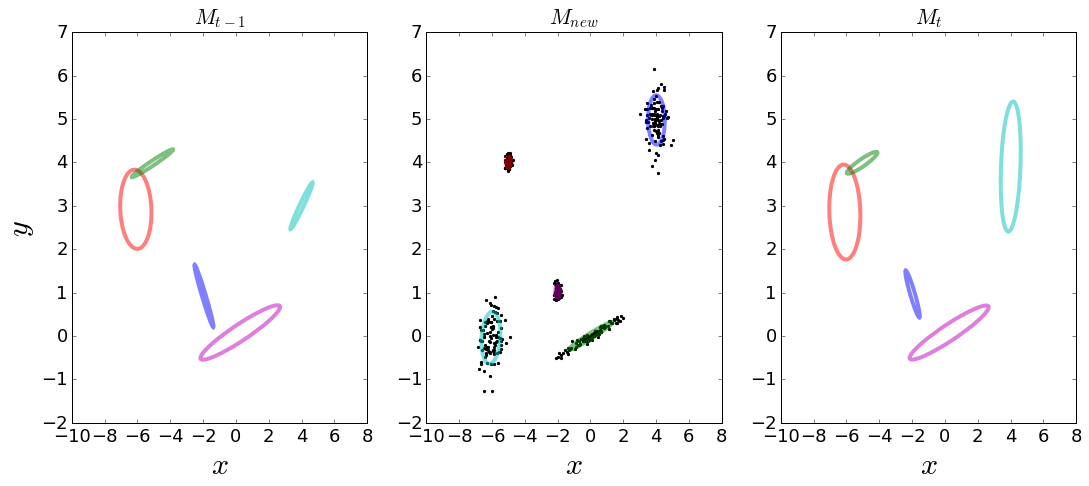

In [7]:
# Batch  3
fig3, ax3 = plt.subplots(1,3)
ax3[0] = model.plot_gmm_projection(0,1, axes=ax3[0])
plt.ylabel('$y$',**axis_font)
plt.title('$M_{t-1}$', y=1.01)

X3 = np.r_[np.dot(np.random.randn(n_samples, 2), 0.5 * C1),
           .1 * np.random.randn(n_samples, 2) + np.array([-5, 4]),
           .1 * np.random.randn(n_samples, 2) + np.array([-2, 1]),
           .4 * np.random.randn(n_samples, 2) + np.array([-6, 0]),
           .4 * np.random.randn(n_samples, 2) + np.array([4, 5])]
model.train(X3)

ax3[1] = model.short_term_model.plot_gmm_projection(0,1, axes=ax3[1])
plt.title('$M_{new}$', y=1.01)
plt.hold(True)
plt.scatter(X3[:,0],X3[:,1],c='k', marker='.')

ax3[2] = model.plot_gmm_projection(0,1, axes=ax3[2])
plt.title('$M_{t}$', y=1.01)
for i in range(3):
    plt.sca(ax3[i])
    ax3[i].set_ylim([-2,7])
    ax3[i].set_xlim([-10,8])
    plt.xlabel('$x$',**axis_font)

In [9]:
fig2.savefig('/home/yumilceh/Dropbox/Aplicaciones/ShareLaTeX/PhD_Thesis/chapters/chapter4/images/il1_igmm.eps',
             format='eps', dpi=1000, transparent=True, rasterized=True)
fig3.savefig('/home/yumilceh/Dropbox/Aplicaciones/ShareLaTeX/PhD_Thesis/chapters/chapter4/images/il2_igmm.eps',
             format='eps', dpi=1000, transparent=True, rasterized=True)
# fig2.savefig('C:/Users/yumilceh/Dropbox/Aplicaciones/ShareLaTeX/PhD_Thesis/chapters/chapter4/images/il1_igmm.eps',
#              format='eps', dpi=1000, transparent=True, rasterized=True)
# fig3.savefig('C:/Users/yumilceh/Dropbox/Aplicaciones/ShareLaTeX/PhD_Thesis/chapters/chapter4/images/il2_igmm.eps',
#              format='eps', dpi=1000, transparent=True, rasterized=True)